In [1]:
pip install -U polars


  Obtaining dependency information for polars from https://files.pythonhosted.org/packages/5c/09/fcb7727a1d7aaf65f813c1f48d75fffbc9661a4bbe81fdc347a07861e716/polars-1.13.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 3.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: polars
    Found existing installation: polars 1.12.0
    Uninstalling polars-1.12.0:
      Successfully uninstalled polars-1.12.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.28.0


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.28.0 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

In [4]:
import pandas as pd

### Data Selection Step

In [5]:
train_labels = pl.read_csv('/Users/doanhtuan137/Downloads/train_labels.csv')

In [6]:
train_labels.head()

customer_ID,target
str,i64
"""0000099d6bd597052cdcda90ffabf5…",0
"""00000fd6641609c6ece5454664794f…",0
"""00001b22f846c82c51f6e3958ccd81…",0
"""000041bdba6ecadd89a52d11886e8e…",0
"""00007889e4fcd2614b6cbe7f8f3d2e…",0


In [7]:
train_labels

customer_ID,target
str,i64
"""0000099d6bd597052cdcda90ffabf5…",0
"""00000fd6641609c6ece5454664794f…",0
"""00001b22f846c82c51f6e3958ccd81…",0
"""000041bdba6ecadd89a52d11886e8e…",0
"""00007889e4fcd2614b6cbe7f8f3d2e…",0
…,…
"""ffff41c8a52833b56430603969b9ca…",0
"""ffff518bb2075e4816ee3fe9f3b152…",0
"""ffff9984b999fccb2b6127635ed073…",0


In [8]:
train_labels = train_labels.sample((len(train_labels)*0.2), seed = 16  )

In [9]:
train_labels.shape

(91782, 2)

In [10]:
print(train_labels.head())

shape: (5, 2)
┌─────────────────────────────────┬────────┐
│ customer_ID                     ┆ target │
│ ---                             ┆ ---    │
│ str                             ┆ i64    │
╞═════════════════════════════════╪════════╡
│ 46d09d19c7254974001a4fddb7b491… ┆ 0      │
│ 97cc37fe45453146c112982b37e1d1… ┆ 0      │
│ f2b8b6bdbe6055a3ab8ebfa64fcb58… ┆ 1      │
│ fdaa05e240a44f673007cdc111e09e… ┆ 1      │
│ 0fba5386c6d0157efa626f66ec3fa3… ┆ 1      │
└─────────────────────────────────┴────────┘


In [11]:
train_data = pl.read_csv('/Users/doanhtuan137/Downloads/train_data.csv')

In [12]:
train_data.shape

(5531451, 190)

In [13]:
development_sample = train_labels.join(train_data, on='customer_ID', how='inner')

## Exploration

In [14]:
development_sample.head()

customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,…,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
str,i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,f64,f64,str,str,str,str,str,f64,f64,f64,str,f64,f64,f64
"""0000099d6bd597052cdcda90ffabf5…",0,"""2017-03-09""",0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,null,null,0.00063,0.080986,0.708906,0.1706,0.006204,0.358587,0.525351,0.255736,null,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,null,0.023381,0.002768,0.008322,1.001519,…,0.676922,0.007871,1.0,0.23825,0.0,4.0,0.23212,0.236266,0.0,0.70228,0.434345,0.003057,0.686516,0.00874,1.0,1.003319,1.007819,1.00008,0.006805,null,0.002052,0.005972,null,0.004345,0.001535,null,null,null,null,null,0.002427,0.003706,0.003818,null,0.000569,0.00061,0.002674
"""0000099d6bd597052cdcda90ffabf5…",0,"""2017-04-07""",0.936665,0.005775,0.004923,1.000653,0.006151,0.12675,0.000798,0.002714,null,null,0.002526,0.069419,0.712795,0.113239,0.006206,0.35363,0.521311,0.223329,null,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,null,0.030599,0.002749,0.002482,1.009033,…,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,null,0.001034,0.004838,null,0.007495,0.004931,null,null,null,null,null,0.003954,0.003167,0.005032,null,0.009576,0.005492,0.009217
"""0000099d6bd597052cdcda90ffabf5…",0,"""2017-05-28""",0.95418,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,null,null,0.007605,0.068839,0.720884,0.060492,0.003259,0.33465,0.524568,0.189424,null,0.066982,0.056647,0.005126,0.151955,1.337179,0.009355,0.007426,0.206629,0.738044,0.134073,null,0.048367,0.010077,0.00053,1.009184,…,0.853498,0.003269,1.0,0.239867,0.0,4.0,0.240768,0.23971,0.0,0.704843,0.434409,0.003954,0.690101,0.009617,1.0,1.009307,1.007831,1.006878,0.003221,null,0.005681,0.005497,null,0.009227,0.009123,null,null,null,null,null,0.003269,0.007329,0.000427,null,0.003429,0.006986,0.002603
"""0000099d6bd597052cdcda90ffabf5…",0,"""2017-06-13""",0.960384,0.002455,0.013683,1.0027,0.001373,0.117169,0.000685,0.005531,null,null,0.006406,0.05563,0.723997,0.166782,0.009918,0.323271,0.530929,0.135586,null,0.08372,0.049253,0.001418,0.151219,1.339909,0.006782,0.003515,0.208214,0.741813,0.134437,null,0.030063,0.009667,0.000783,1.007456,…,0.844667,0.000053,1.0,0.24091,0.0,4.0,0.2394,0.240727,0.0,0.711546,0.436903,0.005135,0.687779,0.004649,1.0,1.001671,1.00346,1.007573,0.007703,null,0.007108,0.008261,null,0.007206,0.002409,null,null,null,null,null,0.006117,0.004516,0.0032,null,0.008419,0.006527,0.0096
"""0000099d6bd597052cdcda90ffabf5…",0,"""2017-07-16""",0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,null,null,0.007731,0.038862,0.720619,0.14363,0.006667,0.231009,0.529305,null,null,0.0759,0.048918,0.001199,0.154026,1.341735,0.000519,0.001362,0.205468,0.691986,0.121518,null,0.054221,0.009484,0.006698,1.003738,…,0.811199,0.008724,1.0,0.247939,0.0,4.0,0.244199,0.242325,0.0,0.705343,0.437433,0.002849,0.688774,0.000097,1.0,1.009886,1.005053,1.008132,0.009823,null,0.00968,0.004848,null,0.006312,0.004462,null,null,null,null,null,0.003671,0.004946,0.008889,null,0.00167,0.008126,0.009827


In [15]:
development_sample.describe()

statistic,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,…,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,f64,f64,str,str,str,str,str,f64,f64,f64,str,f64,f64,f64
"""count""","""1106348""",1.106348e6,"""1106348""",1.097211e6,1.106348e6,1.106348e6,1.105937e6,1.106348e6,902133.0,1.105937e6,1.105937e6,159608.0,774042.0,1.05098e6,1.106348e6,1.105936e6,1.106348e6,1.106348e6,862406.0,1.106348e6,962445.0,"""109711""",1.106295e6,1.106348e6,1.102056e6,476410.0,1.106348e6,1.106348e6,1.106348e6,1.10042e6,1.045731e6,1.106348e6,288893.0,1.106348e6,1.106348e6,1.106348e6,…,825232.0,1.070742e6,1.070742e6,1.070742e6,1.070742e6,1.070742e6,1.070742e6,1.070742e6,1.070742e6,1.070742e6,1.070742e6,1.070742e6,1.070742e6,1.070742e6,1.082792e6,1.106348e6,1.085768e6,1.085768e6,1.106212e6,"""14847""",1.085768e6,1.085768e6,"""109124""",1.097738e6,1.106348e6,"""38612""","""38612""","""38612""","""38612""","""38612""",1.085768e6,1.098123e6,1.085768e6,"""189232""",1.085768e6,1.098103e6,1.085768e6
"""null_count""","""0""",0.0,"""0""",9137.0,0.0,0.0,411.0,0.0,204215.0,411.0,411.0,946740.0,332306.0,55368.0,0.0,412.0,0.0,0.0,243942.0,0.0,143903.0,"""996637""",53.0,0.0,4292.0,629938.0,0.0,0.0,0.0,5928.0,60617.0,0.0,817455.0,0.0,0.0,0.0,…,281116.0,35606.0,35606.0,35606.0,35606.0,35606.0,35606.0,35606.0,35606.0,35606.0,35606.0,35606.0,35606.0,35606.0,23556.0,0.0,20580.0,20580.0,136.0,"""1091501""",20580.0,20580.0,"""997224""",8610.0,0.0,"""1067736""","""1067736""","""1067736""","""1067736""","""1067736""",20580.0,8225.0,20580.0,"""917116""",20580.0,8245.0,20580.0
"""mean""",null,0.249845,null,0.655761,0.153133,0.124832,0.621595,0.079656,0.226266,0.059783,0.13292,0.184003,0.154894,0.118729,0.17199,0.251728,0.082747,0.048316,0.475447,0.40718,0.382622,null,0.147372,0.187096,0.451636,0.173959,0.145326,0.189942,0.12136,0.180339,0.600668,0.226393,0.078323,0.089442,0.111732,0.244895,…,0.277287,0.157192,0.617864,0.277598,0.001207,2.314818,0.283387,0.279276,0.116457,0.532238,0.403645,0.051677,0.305891,0.084746,0.740137,0.10765,0.583685,0.438628,0.031733,null,0.202885,0.10398,null,0.046779,0.005796,null,null,null,null,null,0.179292,0.027051,0.164874,null,0.179169,0.052749,0.061982
"""std""",null,0.432924,null,0.245271,0.270201,0.21411,0.401399,0.228202,0.193244,0.204041,0.236015,0.227217,0.214451,0.221617,0.221473,0.242642,0.364635,0.203582,0.170149,0.235093,0.326293,null,0.959434,0.231845,0.497055,0.48357,0.241619,0.290361,0.212607,0.17447,0.171072,3.767505,0.208078,0.455773,0.210429,0.42703,…,0.326625,0.229995,0.48591,0.255306,0.034716,2.2929,0.255559,0.25611,0.320772,0.234069,0.236677,0.35503,0.227056,0.294076,0.536006,0.303516,0.49322,0.495579,0.21207,null,0.398426,0.296188,null,0.173968,0.028275,null,null,null,null,null,0.379375,0.146869,0.348628,null,0.379269,0.183638,0.19221
"""min""","""0000099d6bd597052cdcda90ffabf5…",0.0,"""2017-03-01""",-0.458955,5.0262e-9,-1.248558,6.2712e-7,2.6005e-9,-0.508883,1.3059e-9,1.4636e-8,-0.000327,5.4293e-7,2.2222e-9,1.6175e-8,4.7930e-7,1.2893e-8,8.2446e-9,-5.427248,-0.02662,-0.009612,"""0.00010502340608928296""",-0.004698,-0.746896,1.6356e-8,-3.672546,1.7920e-8,6.7261e-9,2.1348e-8,-0.007025,-1.51969,-0.002956,5.6781e-8,3.6067e-8,7.4633e-8,1.4336e-8,…,4.4171e-10,1.4635e-11,0.0,2.2281e-7,0.0,-1.0,1.4720e-7,2.3530e-7,0.0,-0.032074,0.000002,9.5234e-9,-0.04545,9.3151e-9,-1.0,5.4012e-8,3.7363e-9,2.4229e-10,2.0307e-9,"""0.000103147723058653""",2.1311e-9,2.6430e-8,"""-0.00010811408139725789""",1.2432e-9,1.1850e-8,"""-

In [16]:
development_sample = development_sample.with_columns(
    pl.col('S_2').str.strptime(pl.Date, '%Y-%m-%d')
)


In [17]:
development_sample.shape

(1106348, 191)

In [18]:
# Count the number of occurrences for each customer ID
customer_month_counts = development_sample.group_by('customer_ID').agg(
    months_of_data=pl.count()
)
# Merge this count back with the original dataframe to get the target variable for each customer
development_sample = development_sample.join(customer_month_counts, on='customer_ID')

/var/folders/_8/r6tmrd5913l149_tjy55m9xm0000gn/T/ipykernel_2705/4160444127.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  months_of_data=pl.count()


In [19]:
print(development_sample.head())

shape: (5, 192)
┌──────────────┬────────┬────────────┬──────────┬───┬──────────┬──────────┬──────────┬─────────────┐
│ customer_ID  ┆ target ┆ S_2        ┆ P_2      ┆ … ┆ D_143    ┆ D_144    ┆ D_145    ┆ months_of_d │
│ ---          ┆ ---    ┆ ---        ┆ ---      ┆   ┆ ---      ┆ ---      ┆ ---      ┆ ata         │
│ str          ┆ i64    ┆ date       ┆ f64      ┆   ┆ f64      ┆ f64      ┆ f64      ┆ ---         │
│              ┆        ┆            ┆          ┆   ┆          ┆          ┆          ┆ u32         │
╞══════════════╪════════╪════════════╪══════════╪═══╪══════════╪══════════╪══════════╪═════════════╡
│ 0000099d6bd5 ┆ 0      ┆ 2017-03-09 ┆ 0.938469 ┆ … ┆ 0.000569 ┆ 0.00061  ┆ 0.002674 ┆ 13          │
│ 97052cdcda90 ┆        ┆            ┆          ┆   ┆          ┆          ┆          ┆             │
│ ffabf5…      ┆        ┆            ┆          ┆   ┆          ┆          ┆          ┆             │
│ 0000099d6bd5 ┆ 0      ┆ 2017-04-07 ┆ 0.936665 ┆ … ┆ 0.009576 ┆ 0.005492 ┆

In [20]:
# Group by the number of months of data and calculate the number of unique customer IDs and default rate
summary_table = development_sample.group_by('months_of_data').agg(
    Number_of_Observations=pl.col('customer_ID').n_unique(),
    Default_Rate=pl.col('target').mean()
).sort('months_of_data')

# Convert the summary table to a pandas DataFrame for display
summary_table_df = summary_table.to_pandas()

summary_table_df = summary_table_df.sort_values(by='months_of_data', ascending=False)

# Display the summary table
print(summary_table_df)


    months_of_data  Number_of_Observations  Default_Rate
12              13                   77113      0.232153
11              12                    2161      0.394262
10              11                    1274      0.464678
9               10                    1362      0.473568
8                9                    1283      0.442712
7                8                    1220      0.434426
6                7                    1011      0.420376
5                6                    1113      0.364780
4                5                     904      0.378319
3                4                     952      0.432773
2                3                    1160      0.356034
1                2                    1214      0.328666
0                1                    1015      0.340887


In [21]:
# Count the number of features in each category
categories = {
    'D_': 'Delinquency variables',
    'S_': 'Spend variables',
    'P_': 'Payment variables',
    'B_': 'Balance variables',
    'R_': 'Risk variables'
}

feature_counts = []
for prefix, category in categories.items():
    count = sum(feature.startswith(prefix) for feature in development_sample.columns)
    feature_counts.append({'Category': category, '# of features': count})

# Convert the list to a Pandas DataFrame
feature_counts_df = pd.DataFrame(feature_counts)

# Display the table
print(feature_counts_df)


                Category  # of features
0  Delinquency variables             96
1        Spend variables             22
2      Payment variables              3
3      Balance variables             40
4         Risk variables             28


In [22]:
categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

all_columns = [c for c in list(development_sample.columns) if c not in ['customer_ID','S_2']]

continuous_columns = [col for col in all_columns if col not in categorical_columns + ['target']]

In [23]:
for col in continuous_columns:
    development_sample = development_sample.cast({col: pl.Float64})

In [24]:
# Define the reference date (most recent date)
reference_date = pl.datetime(2018, 4, 30)

# # # Define a helper function to create aggregated features
# def create_aggregated_features(df, feature, months, agg_func, agg_func_name, reference_date):
#     # Filter the DataFrame to include only the last 'months' months
#     filtered_df = df.filter(pl.col('S_2') >= (reference_date - pl.duration(days = 30*months)))
    
#     # Group by 'customer_ID' and aggregate the feature
#     agg_df = filtered_df.group_by('customer_ID').agg([
#         agg_func(feature).alias(f"{feature}_{agg_func_name}_{months}")
#     ])
    
#     return agg_df

# # Initialize a list to store the feature DataFrames
# feature_dfs = []

# # Iterate over the continuous columns and create aggregated features
# for feature in continuous_columns:
#     for months, agg_func, agg_func_name in [(6, pl.mean, 'mean'), (12, pl.mean, 'mean'), 
#                                              (6, pl.min, 'min'), (9, pl.min, 'min'), 
#                                              (3, pl.sum, 'sum')]:
#         feature_dfs.append(create_aggregated_features(development_sample, feature, months, agg_func, agg_func_name, reference_date))



# -------------------------------------------------------------------------------



# Define a function to create aggregated features
def create_aggregated_features(df, feature, months, reference_date):
    # Filter the DataFrame to include only the last 'months' months
    filtered_df = df.filter(pl.col('S_2') >= (reference_date - pl.duration(days=30*months)))
    
    # Group by 'customer_ID' and calculate aggregated features
    agg_df = filtered_df.group_by('customer_ID').agg([
        pl.col(feature).mean().alias(f"{feature}_Ave_{months}"),
        pl.col(feature).min().alias(f"{feature}_Min_{months}"),
        pl.col(feature).max().alias(f"{feature}_Max_{months}")
    ])
    
    return agg_df

# Define the list of numerical features for which you want to create aggregated features
numerical_features = continuous_columns  # Assuming 'continuous_columns' contains the list of numerical features

# Initialize an empty list to store the feature DataFrames
feature_dfs = []

In [25]:
# Initialize an empty list to store the feature DataFrames
feature_dfs = []

# Iterate over the numerical features and create aggregated features for different time periods
for feature in continuous_columns:
    for months in [6,12]:  # Specify the time periods you want to aggregate over
        feature_df = create_aggregated_features(development_sample, feature, months, reference_date)
        # Keep 'customer_ID' only in the first DataFrame
        if feature_dfs:
            feature_df = feature_df.drop('customer_ID')
        feature_dfs.append(feature_df)

# Combine all aggregated feature DataFrames into a single DataFrame
final_features_df = pl.concat(feature_dfs, how='horizontal')

# Add 'customer_ID' back to the final DataFrame by joining with the first DataFrame in feature_dfs
final_features_df = feature_dfs[0].select('customer_ID').join(final_features_df, on='customer_ID', how='inner')


In [26]:
df_cat = development_sample[categorical_columns + ['customer_ID', 'S_2']]
# for col in categorical_columns:
#     df_cat = df_cat.cast({col: pl.Float64})

In [27]:
df_cat = df_cat.to_dummies(columns = categorical_columns)

In [28]:
# Define a helper function to create aggregated features for binary categorical features
def create_categorical_aggregated_features(df, feature, months, reference_date):
    # Filter the DataFrame to include only the last 'months' months
    filtered_df = df.filter(pl.col('S_2') >= (reference_date - pl.duration(days=30*months)))
    
    # Group by 'customer_ID' and aggregate the feature
    agg_df = filtered_df.group_by('customer_ID').agg([
        (pl.col(feature).sum() / pl.count(feature)).alias(f"{feature}_Response_Rate_{months}"),
        (pl.col(feature).sum().map_elements(lambda x: 1 if x > 0 else 0)).alias(f"{feature}_Ever_Response_{months}")
    ])
    
    return agg_df

# Initialize a list to store the feature DataFrames
cat_feature_dfs = []

# Iterate over the categorical columns and create aggregated features
for feature in df_cat.columns:
    if feature in ['customer_ID', 'S_2']:
        continue
    for months in [6, 12]:
        cat_feature_dfs.append(create_categorical_aggregated_features(df_cat, feature, months, reference_date))

# Join all features into a single DataFrame
# Remove 'customer_ID' from all but the first DataFrame to avoid the DuplicateError
for i in range(1, len(cat_feature_dfs)):
    cat_feature_dfs[i] = cat_feature_dfs[i].drop('customer_ID')

final_cat_df = pl.concat(cat_feature_dfs, how='horizontal')

# print(final_cat_df)

sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredict

In [29]:
dataset = pl.concat([final_features_df, final_cat_df.drop("customer_ID"), development_sample.select(['customer_ID', 'S_2', 'target'] + continuous_columns).group_by('customer_ID').first().drop("customer_ID")], how = "horizontal")

In [30]:
dataset.shape

(91782, 1469)

# Feature selection using XGB

In [31]:
pip install xgboost


python(3388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


In [32]:
import xgboost as xgb

In [33]:
from sklearn.impute import SimpleImputer

### Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['customer_ID', 'target']), dataset['target'], test_size = 0.3, random_state = 6)

In [35]:
# Impute missing values with NaN
imputer = SimpleImputer(strategy='constant', fill_value=np.nan)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert the imputed arrays back to DataFrames
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [36]:
print(X_test['S_2'])

shape: (27_535,)
Series: 'S_2' [date]
[
	2017-03-22
	2017-03-27
	2017-03-20
	2017-03-12
	2017-03-13
	…
	2017-03-18
	2017-03-31
	2017-03-10
	2017-03-09
	2017-03-22
]


In [37]:
X_test_1, X_test_2, y_test_1, y_test_2 = train_test_split(X_test_imputed, y_test, test_size = 0.5, random_state = 6)

In [38]:
classifier = xgb.XGBClassifier(seed=6)
classifier.fit(X_train_imputed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
classifier.feature_importances_

array([0.00101542, 0.00077571, 0.00067491, ..., 0.00121204, 0.00060648,
       0.00116114], dtype=float32)

In [40]:
# Get feature importances
feature_importances = {key: value for key, value in zip(dataset.drop(['customer_ID', 'target']).columns, classifier.feature_importances_)}

# Filter features with importance higher than 0.5%
important_features = {k: v for k, v in feature_importances.items() if v > 0.005}

# Save the feature importances to a CSV file
importance_csv = pd.DataFrame.from_dict(important_features, orient='index', columns=['Importance'])
importance_csv.to_csv("feat_o.csv")

In [41]:
print(important_features)

{'P_2': 0.07955627, 'B_1': 0.006218202, 'B_3': 0.01336338, 'D_42': 0.008499774, 'D_45': 0.0053264624, 'B_10': 0.005086844}


In [42]:
print(importance_csv.head(20))

      Importance
P_2     0.079556
B_1     0.006218
B_3     0.013363
D_42    0.008500
D_45    0.005326
B_10    0.005087


In [43]:
##### Train the XGBoost classifier with specified parameters
classifier = xgb.XGBClassifier(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5, seed=6)
classifier.fit(X_train_imputed, y_train)

# Get feature importances
feature_importances = {key: value for key, value in zip(X_train.columns, classifier.feature_importances_)}

# Filter features with importance higher than 0.5%
important_features_2 = {k: v for k, v in feature_importances.items() if v > 0.005}

# Save the feature importances to a CSV file
importance_csv_2 = pd.DataFrame.from_dict(important_features_2, orient='index', columns=['Importance'])
importance_csv_2.to_csv("feat_o_model_2.csv")

In [44]:
print(important_features_2)

{'P_2': 0.011821231, 'B_3': 0.0063992785, 'D_42': 0.0067192395, 'D_44': 0.005671816, 'D_48': 0.018492676, 'B_6': 0.013534481, 'B_7': 0.010336236, 'D_52': 0.006678899}


In [45]:
print(importance_csv_2.head(10))

      Importance
P_2     0.011821
B_3     0.006399
D_42    0.006719
D_44    0.005672
D_48    0.018493
B_6     0.013534
B_7     0.010336
D_52    0.006679


In [46]:
combined_important_features = list(set(important_features.keys()) | set(important_features_2.keys()))

In [47]:
print(combined_important_features)

['D_45', 'D_44', 'D_48', 'D_52', 'D_42', 'B_6', 'B_3', 'B_1', 'P_2', 'B_10', 'B_7']


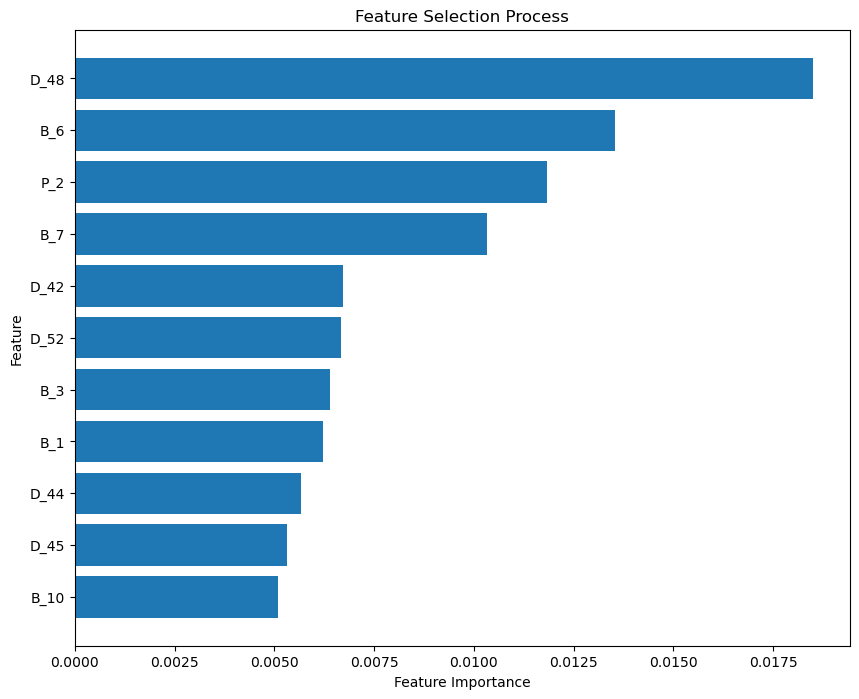

In [48]:
# Combine the feature importances from both models
all_feature_importances = {**important_features, **important_features_2}

# Sort the features by their importance
sorted_features = sorted(all_feature_importances.items(), key=lambda x: x[1], reverse=True)

# Separate the feature names and their importances
feature_names, importances = zip(*sorted_features)

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Selection Process')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()



In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [50]:
# Define the parameter grid with your specified parameters
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 1.0],
    'scale_pos_weight': [1, 5, 10]
}

# Create an empty list to store the results
results = []

# Iterate through each combination of parameters
for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for subsample in param_grid['subsample']:
            for colsample_bytree in param_grid['colsample_bytree']:
                for scale_pos_weight in param_grid['scale_pos_weight']:
                    # Train a model with the current combination of parameters
                    model = xgb.XGBClassifier(
                        n_estimators=n_estimators,
                        learning_rate=learning_rate,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        scale_pos_weight=scale_pos_weight,
                        random_state=42
                    )
                    model.fit(X_train[combined_important_features], y_train)

                    # Compute AUC scores on Train and Test datasets
                    auc_train = roc_auc_score(y_train, model.predict_proba(X_train[combined_important_features])[:, 1])
                    auc_test1 = roc_auc_score(y_test_1, model.predict_proba(X_test_1[combined_important_features])[:, 1])
                    auc_test2 = roc_auc_score(y_test_2, model.predict_proba(X_test_2[combined_important_features])[:, 1])

                    # Append the results to the list
                    results.append({
                        'Number of Trees': n_estimators,
                        'Learning Rate': learning_rate,
                        'Subsample': subsample,
                        'Percentage of Features': colsample_bytree * 100,
                        'Weight of Default': scale_pos_weight,
                        'AUC Train': auc_train,
                        'AUC Test 1': auc_test1,
                        'AUC Test 2': auc_test2
                    })

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


    Number of Trees  Learning Rate  Subsample  Percentage of Features  \
0                50           0.01        0.5                    50.0   
1                50           0.01        0.5                    50.0   
2                50           0.01        0.5                    50.0   
3                50           0.01        0.5                   100.0   
4                50           0.01        0.5                   100.0   
..              ...            ...        ...                     ...   
67              300           0.10        0.8                    50.0   
68              300           0.10        0.8                    50.0   
69              300           0.10        0.8                   100.0   
70              300           0.10        0.8                   100.0   
71              300           0.10        0.8                   100.0   

    Weight of Default  AUC Train  AUC Test 1  AUC Test 2  
0                   1   0.899597    0.896144    0.891542  
1    

In [51]:
# Sort the results by AUC Test 1 and AUC Test 2 (descending order)
sorted_results_df = results_df.sort_values(by=['AUC Test 1', 'AUC Test 2'], ascending=False)

# Print the sorted table
print(sorted_results_df)

# Select the top row as the best model
best_model_row = sorted_results_df.iloc[0]
print("Best model parameters:")
print(best_model_row)

    Number of Trees  Learning Rate  Subsample  Percentage of Features  \
48              300           0.01        0.5                    50.0   
54              300           0.01        0.8                    50.0   
51              300           0.01        0.5                   100.0   
15               50           0.10        0.5                   100.0   
39              100           0.10        0.5                   100.0   
..              ...            ...        ...                     ...   
5                50           0.01        0.5                   100.0   
70              300           0.10        0.8                   100.0   
11               50           0.01        0.8                   100.0   
65              300           0.10        0.5                   100.0   
71              300           0.10        0.8                   100.0   

    Weight of Default  AUC Train  AUC Test 1  AUC Test 2  
48                  1   0.906296    0.898476    0.894412  
54   

In [52]:
# Assuming best_model_row contains the best parameters
optimum_params = {
    'n_estimators': int(best_model_row['Number of Trees']),
    'learning_rate': best_model_row['Learning Rate'],
    'subsample': best_model_row['Subsample'],
    'colsample_bytree': best_model_row['Percentage of Features'] / 100,
    'scale_pos_weight': best_model_row['Weight of Default'],
    'random_state': 42
}

# Re-train the model with the optimum parameters
final_model_xgb = xgb.XGBClassifier(**optimum_params)
final_model_xgb.fit(X_train[combined_important_features], y_train)

# Save the final model
import joblib
joblib.dump(final_model_xgb, 'final_xgb_model.joblib')

print("Final model saved as 'final_xgb_model.joblib'")

Final model saved as 'final_xgb_model.joblib'


In [53]:
print(optimum_params)

{'n_estimators': 300, 'learning_rate': 0.01, 'subsample': 0.5, 'colsample_bytree': 0.5, 'scale_pos_weight': 1.0, 'random_state': 42}


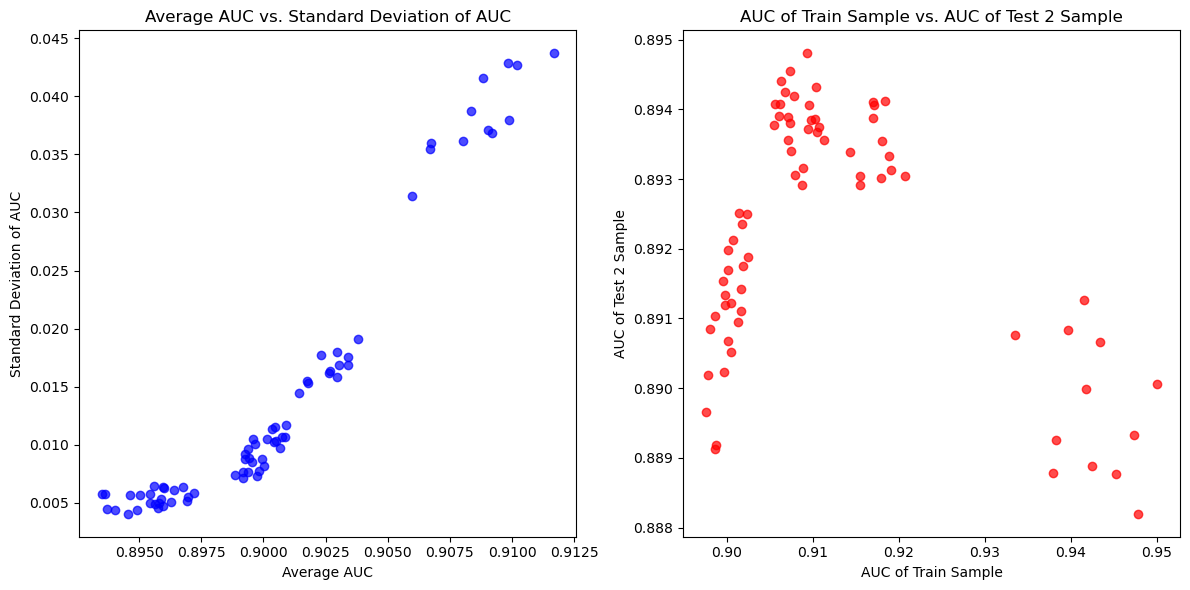

In [54]:
# Calculate average and standard deviation of AUC across three samples for each model
avg_auc = []
std_auc = []
auc_train = []
auc_test2 = []

for idx, row in sorted_results_df.iterrows():
    auc_train.append(row['AUC Train'])
    auc_test2.append(row['AUC Test 2'])
    
    avg = (row['AUC Train'] + row['AUC Test 1'] + row['AUC Test 2']) / 3
    avg_auc.append(avg)
    std = ((row['AUC Train'] - avg)**2 + (row['AUC Test 1'] - avg)**2 + (row['AUC Test 2'] - avg)**2 / 3)**0.5
    std_auc.append(std)

# Create scatter plots

plt.figure(figsize=(12, 6))

# Scatter plot for Average AUC vs. Standard Deviation of AUC
plt.subplot(1, 2, 1)
plt.scatter(avg_auc, std_auc, color='b', alpha=0.7)
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs. Standard Deviation of AUC')

# Scatter plot for AUC of train sample vs. AUC of Test 2 sample
plt.subplot(1, 2, 2)
plt.scatter(auc_train, auc_test2, color='r', alpha=0.7)
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs. AUC of Test 2 Sample')

plt.tight_layout()
plt.show()


In [55]:
sorted_results_df.to_csv('sorted_results.csv', index = False)

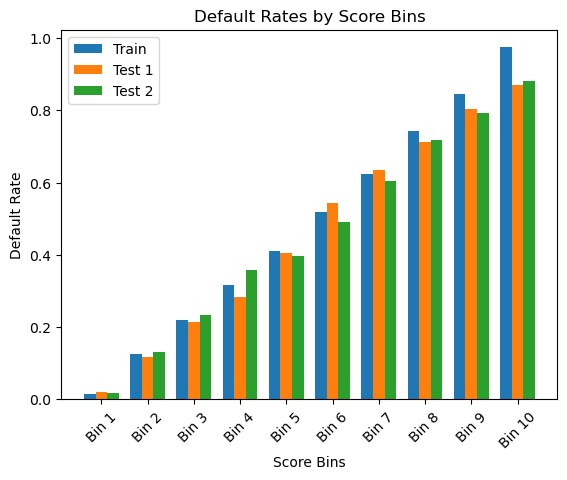

In [56]:
# Predict probabilities of default for train and test samples
train_scores = final_model_xgb.predict_proba(X_train[combined_important_features])[:, 1]
test1_scores = final_model_xgb.predict_proba(X_test_1[combined_important_features])[:, 1]
test2_scores = final_model_xgb.predict_proba(X_test_2[combined_important_features])[:, 1]

num_bins = 10
train_scores_sorted = np.sort(train_scores)
bins = np.linspace(train_scores_sorted[0], train_scores_sorted[-1], num_bins+1)

# Calculate default rates for each bin
def calc_default_rates(scores, y, bins):
    df = pd.DataFrame({'Score': scores, 'Default': y})
    df['Bin'] = pd.cut(df['Score'], bins=bins, include_lowest=True)
    default_rates = df.groupby('Bin')['Default'].mean()
    return default_rates

train_default_rates = calc_default_rates(train_scores, y_train, bins)
test1_default_rates = calc_default_rates(test1_scores, y_test_1, bins)
test2_default_rates = calc_default_rates(test2_scores, y_test_2, bins)

# Create a bar chart
bar_width = 0.25
index = np.arange(num_bins)

plt.bar(index, train_default_rates, bar_width, label='Train')
plt.bar(index + bar_width, test1_default_rates, bar_width, label='Test 1')
plt.bar(index + 2 * bar_width, test2_default_rates, bar_width, label='Test 2')

plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.xticks(index + bar_width, [f'Bin {i+1}' for i in range(num_bins)], rotation=45)
plt.legend()
plt.title('Default Rates by Score Bins')
plt.show()


In [57]:
# Print bin values and default rates
print("Bins and Default Rates:")
print("Bin Range\t\tTrain\t\tTest 1\t\tTest 2")
for i in range(num_bins):
    bin_range = f"[{bins[i]:.2f}, {bins[i+1]:.2f})"
    train_rate = train_default_rates.iloc[i]
    test1_rate = test1_default_rates.iloc[i]
    test2_rate = test2_default_rates.iloc[i]
    print(f"{bin_range}\t{train_rate:.4f}\t{test1_rate:.4f}\t{test2_rate:.4f}")


Bins and Default Rates:
Bin Range		Train		Test 1		Test 2
[0.02, 0.11)	0.0159	0.0200	0.0177
[0.11, 0.19)	0.1251	0.1187	0.1325
[0.19, 0.28)	0.2199	0.2134	0.2331
[0.28, 0.37)	0.3157	0.2823	0.3577
[0.37, 0.46)	0.4107	0.4048	0.3977
[0.46, 0.54)	0.5195	0.5436	0.4899
[0.54, 0.63)	0.6238	0.6351	0.6054
[0.63, 0.72)	0.7416	0.7119	0.7165
[0.72, 0.81)	0.8444	0.8025	0.7936
[0.81, 0.90)	0.9736	0.8684	0.8816


In [58]:
pip install shap

python(3468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


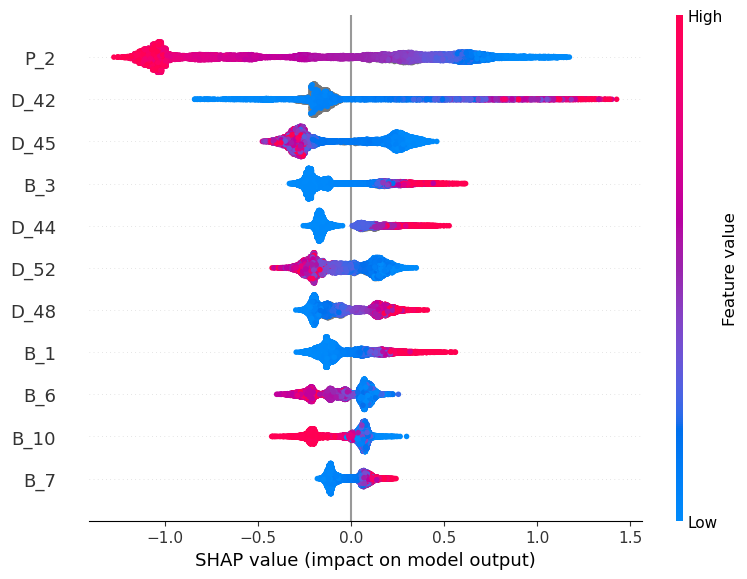

In [59]:
import shap

# Compute SHAP values
explainer = shap.Explainer(final_model_xgb)
shap_values = explainer(X_test_2[combined_important_features])

# Create a Beeswarm plot
shap.summary_plot(shap_values, X_test_2[combined_important_features], plot_type="dot")


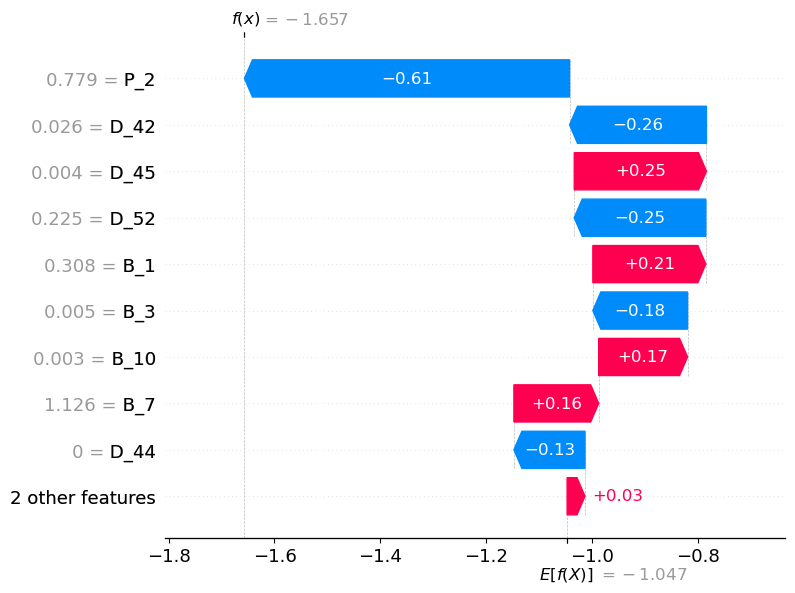

In [60]:
# Select an observation (e.g., the first observation in Test 2 sample)
observation_index = 0
selected_observation = X_test_2[combined_important_features].iloc[observation_index]

# Add an extra dimension to the selected observation to make it 2D
selected_observation_2d = selected_observation.values.reshape(1, -1)

# Compute SHAP values for the selected observation
shap_values_observation = explainer(selected_observation_2d)

# Set the feature names in the Explanation object
shap_values_observation.feature_names = combined_important_features

# Create a Waterfall plot
shap.waterfall_plot(shap_values_observation[0])



# Neural Network

## Missing Value replacement with 0

In [61]:
# Replace NaN values with 0 in the imputed DataFrames
X_train_nn = X_train_imputed.fillna(0)
X_test_1_nn = X_test_1.fillna(0)
X_test_2_nn = X_test_2.fillna(0)

## Outlier Treatment

In [62]:
# Calculate the 1st and 99th percentiles
percentiles = X_train_nn.quantile([0.01, 0.99])

# Cap and floor the values
X_train_nn = X_train_nn.clip(percentiles.iloc[0], percentiles.iloc[1], axis=1)
X_test_1_nn = X_test_1_nn.clip(percentiles.iloc[0], percentiles.iloc[1], axis=1)
X_test_2_nn = X_test_2_nn.clip(percentiles.iloc[0], percentiles.iloc[1], axis=1)


## Normalization

In [63]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the train data and transform both train and test data
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_1_nn = scaler.transform(X_test_1_nn)
X_test_2_nn = scaler.transform(X_test_2_nn)


In [64]:
pip install tensorflow

python(3476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Obtaining dependency information for tensorboard<2.19,>=2.18 from https://files.pythonhosted.org/packages/b1/de/021c1d407befb505791764ad2cbd56ceaaa53a746baed01d2e2143f05f18/tensorboard-2.18.0-py3-none-any.whl.metadata
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Obtaining dependency information for keras>=3.5.0 from https://files.pythonhosted.org/packages/c2/88/eef50051a772dcb4433d1f3e4c1d6576ba450fe83e89d028d7e8b85a2122/keras-3.6.0-py3-none-any.whl.metadata
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Obtaining dependency information for numpy<2.1.0,>=1.26.0 from https://files.pythonhosted.org/packages/c1/ca/2f384720020c7b244d22508cb7ab23d95f179fcfff33c31a6eeba8d6c512/numpy-2.0.2-cp311-cp311-macosx_14_0_arm64.whl.metadata
  Using cached numpy-2.0.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Using cached numpy-2.0.2-cp311-cp311-macosx_14_0_arm64.whl (5.3 MB)
Using cached tensorboar

In [65]:
import numpy as np
X_train_nn = np.array(X_train_nn)
X_test_1_nn = np.array(X_test_1_nn)
X_test_2_nn = np.array(X_test_2_nn)


In [66]:
y_train = np.array(y_train)
y_test_1 = np.array(y_test_1)
y_test_2 = np.array(y_test_2)


In [67]:
pip install --upgrade numpy tensorflow


python(3499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/47/7c/864cb966b96fce5e63fcf25e1e4d957fe5725a635e5f11fe03f39dd9d6b5/numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata
  Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install --upgrade numpy ml_dtypes tensorflow

python(3520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/47/7c/864cb966b96fce5e63fcf25e1e4d957fe5725a635e5f11fe03f39dd9d6b5/numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata
  Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Obtaining dependency information for ml_dtypes from https://files.pythonhosted.org/packages/fe/29/8968fd7ee026c0d04c553fb1ce1cd67f9da668cd567d62c0cdc995ce989e/ml_dtypes-0.5.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Using cached ml_dtypes-0.5.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (21 kB)
Note: you may need to restart the kernel to use updated packages.


In [69]:
pip install tensorflow==2.13.0


python(3546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Obtaining dependency information for tensorflow==2.13.0 from https://files.pythonhosted.org/packages/d6/69/d461fa09235326e08b7ca463d5491426fdd4908ef6d3f9ed51d0777dc071/tensorflow-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (2.6 kB)
  Obtaining dependency information for numpy<=1.24.3,>=1.22 from https://files.pythonhosted.org/packages/ee/6c/7217a8844dfe22e349bccbecd35571fa72c5d7fe8b33d8c5540e8cc2535c/numpy-1.24.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached numpy-1.24.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.6 kB)
  Obtaining dependency information for tensorboard<2.14,>=2.13 from https://files.pythonhosted.org/packages/67/f2/e8be5599634ff063fa2c59b7b51636815909d5140a26df9f02ce5d99b81a/tensorboard-2.13.0-py3-none-any.whl.metadata
  Using cached tensorboard-2.13.0-py3-none-any.whl.metadata (1.8 kB)
  Obtaining dependency information for keras<2.14,>=2.13.1 from https://files.pythonhos

In [70]:
pip install tensorflow-cpu


python(3587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


ERROR: Could not find a version that satisfies the requirement tensorflow-cpu (from versions: none)
ERROR: No matching distribution found for tensorflow-cpu
Note: you may need to restart the kernel to use updated packages.


In [71]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score
import pandas as pd

results_df = pd.DataFrame(columns=['HL', 'Node', 'Activation Function', 'Dropout', 'Batch Size', 'AUC Train', 'AUC Test1', 'AUC Test2'])

# Hyperparameters
n_layers_values = [2, 4]
n_nodes_values = [4, 6]
activation_functions = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]  # 50% dropout and no dropout
batch_sizes = [100, 10000]
epochs = 20

# Loop over each combination of hyperparameters
for n_layers in n_layers_values:
    for n_node in n_nodes_values:
        for activation in activation_functions:
            for dropout in dropout_rates:
                for batch_size in batch_sizes:
                    # Build and compile the model
                    model = tf.keras.models.Sequential()
                    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))  # Input layer
                    for _ in range(n_layers):
                        model.add(tf.keras.layers.Dense(n_node, activation=activation))
                        if dropout < 1.0:
                            model.add(tf.keras.layers.Dropout(dropout))
                    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer
                    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])

                    # Train the model
                    history = model.fit(X_train_nn, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Calculate ROC AUC scores for train, test1, and test2 sets
                    auc_train = roc_auc_score(y_train, model.predict(X_train_nn))
                    auc_test1 = roc_auc_score(y_test_1, model.predict(X_test_1_nn))
                    auc_test2 = roc_auc_score(y_test_2, model.predict(X_test_2_nn))

                    # Create a DataFrame from the results
                    result_dict = {
                        'HL': n_layers,
                        'Node': n_node,
                        'Activation Function': activation,
                        'Dropout': f"{int((1 - dropout) * 100)}%",
                        'Batch Size': batch_size,
                        'AUC Train': auc_train,
                        'AUC Test1': auc_test1,
                        'AUC Test2': auc_test2
                    }

                    result_df = pd.DataFrame([result_dict])

                    # Concatenate the DataFrame to results_df
                    results_df = pd.concat([results_df, result_df], ignore_index=True)

                    print(f"Model with {n_layers} layers, {n_node} nodes per layer, {activation} activation, "
                          f"{int((1 - dropout) * 100)}% dropout, and batch size {batch_size} finished training. "
                          f"Train AUC: {auc_train}, Test1 AUC: {auc_test1}, Test2 AUC: {auc_test2}")

# Optionally, save the results to a CSV file after the entire grid search
results_df.to_csv('grid_search_results.csv', index=False)


AttributeError: module 'tensorflow' has no attribute 'keras'

In [75]:
pip install torch

python(3809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d0/db/5d9cbfbc7968d79c5c09a0bc0bc3735da079f2fd07cc10498a62b320a480/torch-2.5.1-cp311-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for sympy==1.13.1 from https://files.pythonhosted.org/packages/b2/fe/81695a1aa331a842b582453b605175f419fe8540355886031328089d840a/sympy-1.13.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 2.0 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 1.8 MB/s eta 0:00:0000:0100:01
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
  

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score
import pandas as pd

results_df = pd.DataFrame(columns=['HL', 'Node', 'Activation Function', 'Dropout', 'Batch Size', 'AUC Train', 'AUC Test1', 'AUC Test2'])

# Hyperparameters
n_layers_values = [2, 4]
n_nodes_values = [4, 6]
activation_functions = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]  # 50% dropout and no dropout
batch_sizes = [100, 10000]
epochs = 20

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define a function to build the model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, n_layers, n_node, activation, dropout):
        super(SimpleNN, self).__init__()
        self.layers = nn.ModuleList()
        
        # Define activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        
        # Input layer
        self.layers.append(nn.Linear(input_dim, n_node))
        
        # Hidden layers
        for _ in range(n_layers - 1):
            self.layers.append(nn.Linear(n_node, n_node))
            if dropout < 1.0:
                self.layers.append(nn.Dropout(dropout))
        
        # Output layer
        self.output_layer = nn.Linear(n_node, 1)
        
    def forward(self, x):
        for layer in self.layers:
            x = self.activation(layer(x))
        x = torch.sigmoid(self.output_layer(x))
        return x

# Loop over each combination of hyperparameters
for n_layers in n_layers_values:
    for n_node in n_nodes_values:
        for activation in activation_functions:
            for dropout in dropout_rates:
                for batch_size in batch_sizes:
                    
                    # Initialize the model, loss function, and optimizer
                    model = SimpleNN(X_train.shape[1], n_layers, n_node, activation, dropout).to(device)
                    criterion = nn.BCELoss()
                    optimizer = optim.Adam(model.parameters(), lr=0.001)
                    
                    # Training loop
                    for epoch in range(epochs):
                        model.train()
                        for i in range(0, len(X_train_nn), batch_size):
                            batch_X = torch.tensor(X_train_nn[i:i+batch_size], dtype=torch.float32).to(device)
                            batch_y = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32).to(device)
                            
                            # Forward pass
                            outputs = model(batch_X).squeeze()
                            loss = criterion(outputs, batch_y)
                            
                            # Backward pass and optimization
                            optimizer.zero_grad()
                            loss.backward()
                            optimizer.step()
                    
                    # Evaluate the model on train, test1, and test2
                    model.eval()
                    with torch.no_grad():
                        auc_train = roc_auc_score(y_train, model(torch.tensor(X_train_nn, dtype=torch.float32).to(device)).cpu().numpy())
                        auc_test1 = roc_auc_score(y_test_1, model(torch.tensor(X_test_1_nn, dtype=torch.float32).to(device)).cpu().numpy())
                        auc_test2 = roc_auc_score(y_test_2, model(torch.tensor(X_test_2_nn, dtype=torch.float32).to(device)).cpu().numpy())
                    
                    # Save results
                    result_dict = {
                        'HL': n_layers,
                        'Node': n_node,
                        'Activation Function': activation,
                        'Dropout': f"{int((1 - dropout) * 100)}%",
                        'Batch Size': batch_size,
                        'AUC Train': auc_train,
                        'AUC Test1': auc_test1,
                        'AUC Test2': auc_test2
                    }

                    result_df = pd.DataFrame([result_dict])
                    results_df = pd.concat([results_df, result_df], ignore_index=True)

                    print(f"Model with {n_layers} layers, {n_node} nodes per layer, {activation} activation, "
                          f"{int((1 - dropout) * 100)}% dropout, and batch size {batch_size} finished training. "
                          f"Train AUC: {auc_train}, Test1 AUC: {auc_test1}, Test2 AUC: {auc_test2}")

# Optionally, save the results to a CSV file after the entire grid search
results_df.to_csv('grid_search_results_pytorch.csv', index=False)


Model with 2 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.9281690250207326, Test1 AUC: 0.8934036896540541, Test2 AUC: 0.8904832572382093
Model with 2 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.8952644810193422, Test1 AUC: 0.878218851757301, Test2 AUC: 0.8792432295886019
Model with 2 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.9316667264689871, Test1 AUC: 0.8934978314190525, Test2 AUC: 0.8888058027852136
Model with 2 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.8806471190391336, Test1 AUC: 0.8684237554662353, Test2 AUC: 0.8650320111346906
Model with 2 layers, 4 nodes per layer, tanh activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.927353794039749, Test1 AUC: 0.8913945832937822, Test2 AUC: 0.8849256118796447


In [77]:
import numpy as np

X_train_nn = np.array(X_train_nn, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)  # hoặc np.int32 nếu dữ liệu là nhãn nhị phân


In [78]:
# Sort the results by AUC Test 1 and AUC Test 2 (descending order)
sorted_results_df_2 = results_df.sort_values(by=['AUC Test1', 'AUC Test2'], ascending=False)

# Print the sorted table
print(sorted_results_df_2)

sorted_results_df_2.to_csv('sorted_results_df_2.csv', index = False)

# Select the top row as the best model
best_model_row_2 = sorted_results_df_2.iloc[0]
print("Best model parameters:")
print(best_model_row_2)

   HL Node Activation Function Dropout Batch Size  AUC Train  AUC Test1  \
31  4    6                tanh      0%      10000   0.910575   0.895069   
2   2    4                relu      0%        100   0.931667   0.893498   
0   2    4                relu     50%        100   0.928169   0.893404   
13  2    6                tanh     50%      10000   0.906981   0.893327   
21  4    4                tanh     50%      10000   0.901878   0.892870   
22  4    4                tanh      0%        100   0.928418   0.891841   
4   2    4                tanh     50%        100   0.927354   0.891395   
15  2    6                tanh      0%      10000   0.903113   0.890995   
5   2    4                tanh     50%      10000   0.899911   0.890814   
6   2    4                tanh      0%        100   0.929617   0.890315   
17  4    4                relu     50%      10000   0.899863   0.889708   
9   2    6                relu     50%      10000   0.909617   0.889660   
28  4    6               

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score
import pandas as pd

# Các siêu tham số tốt nhất từ grid search
optimum_params = {
    'n_layers': int(best_model_row_2['HL']),
    'n_nodes': int(best_model_row_2['Node']),
    'activation': best_model_row_2['Activation Function'],
    'dropout_rate': 1 - (int(best_model_row_2['Dropout'].strip('%')) / 100),
    'batch_size': int(best_model_row_2['Batch Size']),
}

# Cấu hình thiết bị (GPU nếu có)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Xây dựng kiến trúc mô hình
class CustomModel(nn.Module):
    def __init__(self, input_dim, n_layers, n_nodes, activation, dropout_rate):
        super(CustomModel, self).__init__()
        self.layers = nn.ModuleList()
        self.activation = nn.ReLU() if activation == 'relu' else nn.Tanh()
        
        # Tầng đầu vào
        self.layers.append(nn.Linear(input_dim, n_nodes))
        
        # Tầng ẩn
        for _ in range(n_layers - 1):
            self.layers.append(nn.Linear(n_nodes, n_nodes))
            if dropout_rate < 1.0:
                self.layers.append(nn.Dropout(dropout_rate))
            self.layers.append(nn.BatchNorm1d(n_nodes))
        
        # Tầng đầu ra
        self.output_layer = nn.Linear(n_nodes, 1)
    
    def forward(self, x):
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                x = self.activation(layer(x))
            else:
                x = layer(x)  # BatchNorm và Dropout
        x = torch.sigmoid(self.output_layer(x))
        return x

# Khởi tạo mô hình, hàm mất mát, và tối ưu hóa
input_dim = X_train.shape[1]  # Số lượng đặc trưng của dữ liệu huấn luyện
model = CustomModel(input_dim, optimum_params['n_layers'], optimum_params['n_nodes'], 
                    optimum_params['activation'], optimum_params['dropout_rate']).to(device)

criterion = nn.BCELoss()  # Hàm mất mát cho bài toán phân loại nhị phân
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Chuẩn bị dữ liệu đầu vào dưới dạng tensor
X_train_tensor = torch.tensor(X_train_nn, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_test_1_nn, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_test_1, dtype=torch.float32).to(device)

# Huấn luyện mô hình
epochs = 20
batch_size = optimum_params['batch_size']

for epoch in range(epochs):
    model.train()
    for i in range(0, X_train_tensor.shape[0], batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]
        
        # Forward pass
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y)
        
        # Backward pass và tối ưu hóa
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Đánh giá sau mỗi epoch
    model.eval()
    with torch.no_grad():
        train_auc = roc_auc_score(y_train, model(X_train_tensor).cpu().numpy())
        val_auc = roc_auc_score(y_test_1, model(X_val_tensor).cpu().numpy())
    
    print(f'Epoch [{epoch+1}/{epochs}], Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}')

# Lưu mô hình sau khi huấn luyện xong
torch.save(model.state_dict(), 'final_nn_model.pth')


Epoch [1/20], Train AUC: 0.7906, Validation AUC: 0.7706
Epoch [2/20], Train AUC: 0.8686, Validation AUC: 0.8559
Epoch [3/20], Train AUC: 0.8812, Validation AUC: 0.8708
Epoch [4/20], Train AUC: 0.8886, Validation AUC: 0.8787
Epoch [5/20], Train AUC: 0.8939, Validation AUC: 0.8841
Epoch [6/20], Train AUC: 0.8976, Validation AUC: 0.8873
Epoch [7/20], Train AUC: 0.9012, Validation AUC: 0.8898
Epoch [8/20], Train AUC: 0.9043, Validation AUC: 0.8919
Epoch [9/20], Train AUC: 0.9071, Validation AUC: 0.8937
Epoch [10/20], Train AUC: 0.9094, Validation AUC: 0.8948
Epoch [11/20], Train AUC: 0.9114, Validation AUC: 0.8958
Epoch [12/20], Train AUC: 0.9133, Validation AUC: 0.8967
Epoch [13/20], Train AUC: 0.9150, Validation AUC: 0.8972
Epoch [14/20], Train AUC: 0.9166, Validation AUC: 0.8973
Epoch [15/20], Train AUC: 0.9181, Validation AUC: 0.8972
Epoch [16/20], Train AUC: 0.9196, Validation AUC: 0.8969
Epoch [17/20], Train AUC: 0.9210, Validation AUC: 0.8964
Epoch [18/20], Train AUC: 0.9223, Valida

In [86]:
# Khởi tạo lại mô hình với cấu hình tương tự
model = CustomModel(input_dim, optimum_params['n_layers'], optimum_params['n_nodes'], 
                    optimum_params['activation'], optimum_params['dropout_rate']).to(device)

# Tải lại các trọng số của mô hình đã lưu
model.load_state_dict(torch.load('final_nn_model.pth'))

print("Final NN model loaded from 'final_nn_model.pth'")


Final NN model loaded from 'final_nn_model.pth'


/var/folders/_8/r6tmrd5913l149_tjy55m9xm0000gn/T/ipykernel_2705/2150553285.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('final_nn_mod

## Best Model

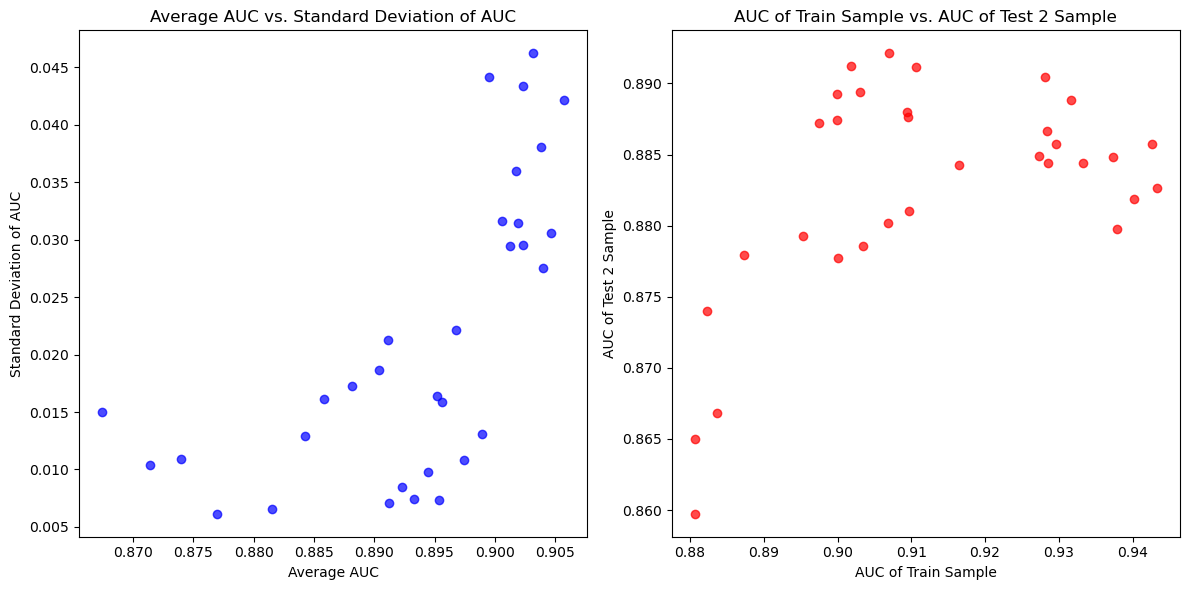

In [87]:
# Calculate average and standard deviation of AUC across three samples for each model
avg_auc = []
std_auc = []
auc_train = []
auc_test2 = []

for idx, row in sorted_results_df_2.iterrows():
    auc_train.append(row['AUC Train'])
    auc_test2.append(row['AUC Test2'])
    
    avg = (row['AUC Train'] + row['AUC Test1'] + row['AUC Test2']) / 3
    avg_auc.append(avg)
    std = ((row['AUC Train'] - avg)**2 + (row['AUC Test1'] - avg)**2 + (row['AUC Test2'] - avg)**2 / 3)**0.5
    std_auc.append(std)

# Create scatter plots

plt.figure(figsize=(12, 6))

# Scatter plot for Average AUC vs. Standard Deviation of AUC
plt.subplot(1, 2, 1)
plt.scatter(avg_auc, std_auc, color='b', alpha=0.7)
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs. Standard Deviation of AUC')

# Scatter plot for AUC of train sample vs. AUC of Test 2 sample
plt.subplot(1, 2, 2)
plt.scatter(auc_train, auc_test2, color='r', alpha=0.7)
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs. AUC of Test 2 Sample')

plt.tight_layout()
plt.show()


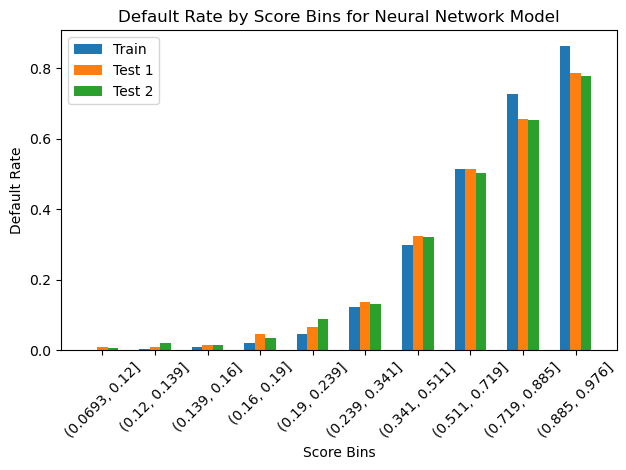

In [89]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lấy xác suất dự đoán của lớp mặc định (1) cho mỗi mẫu
model.eval()  # Đặt mô hình vào chế độ đánh giá
with torch.no_grad():
    nn_probs_train = model(torch.tensor(X_train_nn, dtype=torch.float32).to(device)).cpu().numpy().flatten()
    nn_probs_test1 = model(torch.tensor(X_test_1_nn, dtype=torch.float32).to(device)).cpu().numpy().flatten()
    nn_probs_test2 = model(torch.tensor(X_test_2_nn, dtype=torch.float32).to(device)).cpu().numpy().flatten()

# Định nghĩa các khoảng điểm dựa trên tập huấn luyện
bins = pd.qcut(nn_probs_train, q=10, duplicates='drop').categories

# Áp dụng các ngưỡng tương tự cho các mẫu kiểm thử
train_bins = pd.cut(nn_probs_train, bins=bins, labels=bins, include_lowest=True)
test1_bins = pd.cut(nn_probs_test1, bins=bins, labels=bins, include_lowest=True)
test2_bins = pd.cut(nn_probs_test2, bins=bins, labels=bins, include_lowest=True)

# Hàm tính toán tỷ lệ mặc định cho mỗi khoảng trong mỗi mẫu
def calculate_default_rates(y, bins):
    df = pd.DataFrame({'y': y, 'bins': bins})
    default_rates = df.groupby('bins')['y'].mean()
    return default_rates

# Tính toán tỷ lệ mặc định cho từng khoảng trong các tập dữ liệu
train_default_rates = calculate_default_rates(y_train, train_bins)
test1_default_rates = calculate_default_rates(y_test_1, test1_bins)
test2_default_rates = calculate_default_rates(y_test_2, test2_bins)

# Tạo biểu đồ thanh hiển thị tỷ lệ mặc định cho mỗi khoảng trên ba mẫu
width = 0.2  # Độ rộng của các thanh
x = np.arange(len(bins))  # Vị trí của các nhãn

plt.bar(x - width, train_default_rates, width, label='Train')
plt.bar(x, test1_default_rates, width, label='Test 1')
plt.bar(x + width, test2_default_rates, width, label='Test 2')

plt.xticks(x, bins, rotation=45)
plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Default Rate by Score Bins for Neural Network Model')
plt.legend()
plt.tight_layout()
plt.show()


In [90]:
print(best_model_row)
print("----------------------------------")
print(best_model_row_2)

Number of Trees           300.000000
Learning Rate               0.010000
Subsample                   0.500000
Percentage of Features     50.000000
Weight of Default           1.000000
AUC Train                   0.906296
AUC Test 1                  0.898476
AUC Test 2                  0.894412
Name: 48, dtype: float64
----------------------------------
HL                            4
Node                          6
Activation Function        tanh
Dropout                      0%
Batch Size                10000
AUC Train              0.910575
AUC Test1              0.895069
AUC Test2              0.891153
Name: 31, dtype: object


In [92]:
# Extract AUC scores for XGBoost and Neural Network models
xgb_auc_test1 = best_model_row['AUC Test 1']
xgb_auc_test2 = best_model_row['AUC Test 2']
nn_auc_test1 = best_model_row_2['AUC Test1']
nn_auc_test2 = best_model_row_2['AUC Test2']

# Compare the average AUC scores
avg_auc_xgb = (xgb_auc_test1 + xgb_auc_test2) / 2
avg_auc_nn = (nn_auc_test1 + nn_auc_test2) / 2

print(f"Average AUC for XGBoost: {avg_auc_xgb}")
print(f"Average AUC for Neural Network: {avg_auc_nn}")

# Determine the best model
if avg_auc_xgb > avg_auc_nn:
    print("XGBoost is the best model.")
else:
    print("Neural Network is the best model.")

Average AUC for XGBoost: 0.8964439317767869
Average AUC for Neural Network: 0.8931109059397496
XGBoost is the best model.


In [93]:
# Get predictions for the train dataset
xgb_predictions_train = final_model_xgb.predict(X_train_imputed[combined_important_features])

# Get predictions for the test1 dataset
xgb_predictions_test1 = final_model_xgb.predict(X_test_1[combined_important_features])

# Get predictions for the test2 dataset
xgb_predictions_test2 = final_model_xgb.predict(X_test_2[combined_important_features])

# Get predicted probabilities for the train dataset
xgb_probs_train = final_model_xgb.predict_proba(X_train_imputed[combined_important_features])

# Get predicted probabilities for the test1 dataset
xgb_probs_test1 = final_model_xgb.predict_proba(X_test_1[combined_important_features])

# Get predicted probabilities for the test2 dataset
xgb_probs_test2 = final_model_xgb.predict_proba(X_test_2[combined_important_features])

In [98]:
import numpy as np
import pandas as pd
from datetime import datetime

# Các ngưỡng khác nhau
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Các danh sách để lưu trữ kết quả
default_rates_train = []
portfolio_revenues_train = []
applicant_counts_train = []

# Chuyển đổi định dạng ngày tháng
start_date = datetime(2017, 11, 1)
end_date = datetime(2018, 4, 30)

# Lọc dữ liệu để chỉ lấy 6 tháng cuối
filtered_data_train = X_train.filter((pl.col('S_2') >= start_date) & (pl.col('S_2') <= end_date))

# Tính toán số dư trung bình cho dữ liệu đã lọc
average_balance_train = filtered_data_train.select(pl.mean('B_3')).to_numpy()[0, 0]

# Tính toán doanh thu hàng tháng cho 1 khách hàng
monthly_revenue_train = average_balance_train * 0.02

# Doanh thu hàng năm dự kiến cho dữ liệu huấn luyện
expected_revenue_train = monthly_revenue_train * 12

# Lặp qua từng ngưỡng để tính toán cho dữ liệu huấn luyện
for threshold in thresholds:
    # Lọc các ứng viên dựa trên ngưỡng cho dữ liệu huấn luyện
    accepted_indices_train = xgb_probs_train[:, 1] < threshold  # True cho ứng viên được chấp nhận, False cho bị từ chối

    try:
        # Sử dụng .filter() để lọc các ứng viên đã chấp nhận trong y_train
        accepted_indices_train_series = pl.Series(accepted_indices_train)
        defaulted_applicants_train = y_train.filter(accepted_indices_train_series).sum()
    except Exception as e:
        print(f"Encountered an error at threshold {threshold}: {e}")
        defaulted_applicants_train = 0  # Gán giá trị mặc định nếu gặp lỗi

    # Tính tổng số lượng ứng viên được chấp nhận
    total_applicants_train = np.sum(accepted_indices_train)

    # Tính tỷ lệ vỡ nợ trong tất cả các ứng viên
    default_rate_train = defaulted_applicants_train / total_applicants_train if total_applicants_train > 0 else 0

    # Tính doanh thu của danh mục cho dữ liệu huấn luyện
    portfolio_revenue_value_train = np.sum(expected_revenue_train * accepted_indices_train)

    # Thêm kết quả vào các danh sách cho dữ liệu huấn luyện
    default_rates_train.append(default_rate_train)
    portfolio_revenues_train.append(portfolio_revenue_value_train)
    applicant_counts_train.append(total_applicants_train)

# In ra kết quả cho mỗi ngưỡng
for i, threshold in enumerate(thresholds):
    print(f"Training Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_train[i]:.2%}, Portfolio Revenue: ${portfolio_revenues_train[i]:.2f}, Number of Applicants: {applicant_counts_train[i]}")


Encountered an error at threshold 0.1: 'numpy.ndarray' object has no attribute 'filter'
Encountered an error at threshold 0.2: 'numpy.ndarray' object has no attribute 'filter'
Encountered an error at threshold 0.3: 'numpy.ndarray' object has no attribute 'filter'
Encountered an error at threshold 0.4: 'numpy.ndarray' object has no attribute 'filter'
Encountered an error at threshold 0.5: 'numpy.ndarray' object has no attribute 'filter'
Encountered an error at threshold 0.6: 'numpy.ndarray' object has no attribute 'filter'
Encountered an error at threshold 0.7: 'numpy.ndarray' object has no attribute 'filter'
Encountered an error at threshold 0.8: 'numpy.ndarray' object has no attribute 'filter'
Encountered an error at threshold 0.9: 'numpy.ndarray' object has no attribute 'filter'
Encountered an error at threshold 1.0: 'numpy.ndarray' object has no attribute 'filter'
Training Data - Threshold: 0.1, Default Rate: 0.00%, Portfolio Revenue: $337.68, Number of Applicants: 29582
Training Da

In [99]:
print("Shape of xgb_probs_train:", xgb_probs_train.shape)
print("Length of y_train:", len(y_train))


Shape of xgb_probs_train: (64247, 2)
Length of y_train: 64247


In [100]:
X_test_1_new, X_test_2_new, y_test_1_new, y_test_2_new = train_test_split(X_test, y_test, test_size = 0.5, random_state = 6)

In [101]:
# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the training data
default_rates_test_1 = []
portfolio_revenues_test_1 = []
applicant_counts_test_1 = []

# Convert string literals to date objects for Polars
start_date = pl.datetime(2017, 11, 1)
end_date = pl.datetime(2018, 4, 30)

# Filter the data to include only the last 6 months
filtered_data_test_1 = X_test_1_new.filter((pl.col('S_2') >= start_date) & (pl.col('S_2') <= end_date))

# Calculate the average balance for the filtered data
average_balance_test_1 = filtered_data_test_1.select(pl.mean('B_3')).to_numpy()[0, 0]

# Calculate the monthly revenue for 1 customer for the training data
monthly_revenue_test_1 = average_balance_test_1 * 0.02

# Calculate the expected annual revenue for the training data over the next 12 months
expected_revenue_test_1 = monthly_revenue_test_1 * 12

# Iterate through the thresholds for the training data
for threshold in thresholds:
    # Filter applicants based on the threshold for the training data
    accepted_indices_test_1 = xgb_probs_test1[:, 1] < threshold  # True for accepted, False for rejected

    # Convert the NumPy boolean array to a Polars Series
    accepted_indices_test1_series = pl.Series(accepted_indices_test_1)

    # Calculate the number of applicants (both defaulted and not defaulted) for the training data
    total_applicants_test_1 = np.sum(accepted_indices_test_1)

    # Calculate the number of applicants who defaulted for the training data
    defaulted_applicants_test_1 = y_test_1_new.filter(accepted_indices_test1_series).sum()

    # Calculate the default rate among all applicants for the training data
    default_rate_test_1 = defaulted_applicants_test_1 / total_applicants_test_1 if total_applicants_test_1 > 0 else 0

    # Calculate the portfolio revenue for the training data
    portfolio_revenue_value_test_1 = np.sum(expected_revenue_test_1 * accepted_indices_test_1)

    # Append results to the lists for the training data
    default_rates_test_1.append(default_rate_test_1)
    portfolio_revenues_test_1.append(portfolio_revenue_value_test_1)
    applicant_counts_test_1.append(total_applicants_test_1)

# Print the results for each threshold for the training data
for i, threshold in enumerate(thresholds):
    print(f"Test-1 Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_test_1[i]:.2%}, Portfolio Revenue: ${portfolio_revenues_test_1[i]:.2f}, Number of Applicants: {applicant_counts_test_1[i]}")


Test-1 Data - Threshold: 0.1, Default Rate: 1.87%, Portfolio Revenue: $62.64, Number of Applicants: 6371
Test-1 Data - Threshold: 0.2, Default Rate: 3.59%, Portfolio Revenue: $76.39, Number of Applicants: 7769
Test-1 Data - Threshold: 0.3, Default Rate: 5.39%, Portfolio Revenue: $84.49, Number of Applicants: 8593
Test-1 Data - Threshold: 0.4, Default Rate: 7.67%, Portfolio Revenue: $92.60, Number of Applicants: 9418
Test-1 Data - Threshold: 0.5, Default Rate: 11.39%, Portfolio Revenue: $102.52, Number of Applicants: 10427
Test-1 Data - Threshold: 0.6, Default Rate: 15.97%, Portfolio Revenue: $113.25, Number of Applicants: 11518
Test-1 Data - Threshold: 0.7, Default Rate: 21.30%, Portfolio Revenue: $125.86, Number of Applicants: 12800
Test-1 Data - Threshold: 0.8, Default Rate: 24.90%, Portfolio Revenue: $134.43, Number of Applicants: 13672
Test-1 Data - Threshold: 0.9, Default Rate: 25.32%, Portfolio Revenue: $135.37, Number of Applicants: 13767
Test-1 Data - Threshold: 1.0, Default Ra

In [102]:
# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the training data
default_rates_test_2 = []
portfolio_revenues_test_2 = []
applicant_counts_test_2 = []

# Convert string literals to date objects for Polars
start_date = pl.datetime(2017, 11, 1)
end_date = pl.datetime(2018, 4, 30)

# Filter the data to include only the last 6 months
filtered_data_test_2 = X_test_2_new.filter((pl.col('S_2') >= start_date) & (pl.col('S_2') <= end_date))

# Calculate the average balance for the filtered data
average_balance_test_2 = filtered_data_test_2.select(pl.mean('B_3')).to_numpy()[0, 0]

# Calculate the monthly revenue for 1 customer for the training data
monthly_revenue_test_2 = average_balance_test_2 * 0.02

# Calculate the expected annual revenue for the training data over the next 12 months
expected_revenue_test_2 = monthly_revenue_test_2 * 12

# Iterate through the thresholds for the training data
for threshold in thresholds:
    # Filter applicants based on the threshold for the training data
    accepted_indices_test_2 = xgb_probs_test2[:, 1] < threshold  # True for accepted, False for rejected

    # Convert the NumPy boolean array to a Polars Series
    accepted_indices_test2_series = pl.Series(accepted_indices_test_2)

    # Calculate the number of applicants (both defaulted and not defaulted) for the training data
    total_applicants_test_2 = np.sum(accepted_indices_test_2)

    # Calculate the number of applicants who defaulted for the training data
    defaulted_applicants_test_2 = y_test_2_new.filter(accepted_indices_test2_series).sum()

    # Calculate the default rate among all applicants for the training data
    default_rate_test_2 = defaulted_applicants_test_2 / total_applicants_test_2 if total_applicants_test_2 > 0 else 0

    # Calculate the portfolio revenue for the training data
    portfolio_revenue_value_test_2 = np.sum(expected_revenue_test_2 * accepted_indices_test_2)

    # Append results to the lists for the training data
    default_rates_test_2.append(default_rate_test_2)
    portfolio_revenues_test_2.append(portfolio_revenue_value_test_2)
    applicant_counts_test_2.append(total_applicants_test_2)

# Print the results for each threshold for the training data
for i, threshold in enumerate(thresholds):
    print(f"Test-2 Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_test_2[i]:.2%}, Portfolio Revenue: ${portfolio_revenues_test_2[i]:.2f}, Number of Applicants: {applicant_counts_test_2[i]}")


Test-2 Data - Threshold: 0.1, Default Rate: 1.63%, Portfolio Revenue: $66.08, Number of Applicants: 6306
Test-2 Data - Threshold: 0.2, Default Rate: 3.60%, Portfolio Revenue: $79.73, Number of Applicants: 7609
Test-2 Data - Threshold: 0.3, Default Rate: 5.86%, Portfolio Revenue: $89.08, Number of Applicants: 8501
Test-2 Data - Threshold: 0.4, Default Rate: 8.75%, Portfolio Revenue: $97.79, Number of Applicants: 9332
Test-2 Data - Threshold: 0.5, Default Rate: 11.97%, Portfolio Revenue: $108.13, Number of Applicants: 10319
Test-2 Data - Threshold: 0.6, Default Rate: 16.19%, Portfolio Revenue: $119.72, Number of Applicants: 11425
Test-2 Data - Threshold: 0.7, Default Rate: 21.38%, Portfolio Revenue: $133.02, Number of Applicants: 12694
Test-2 Data - Threshold: 0.8, Default Rate: 25.47%, Portfolio Revenue: $143.30, Number of Applicants: 13675
Test-2 Data - Threshold: 0.9, Default Rate: 25.86%, Portfolio Revenue: $144.27, Number of Applicants: 13768
Test-2 Data - Threshold: 1.0, Default Ra